# Keras classification project 
##### Breast Cancer Data

Let's explore a classification task with Keras API for TF 2.0

The Data
Breast cancer wisconsin (diagnostic) dataset
Data Set Characteristics:

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 3 is Mean Radius, field
    13 is Radius SE, field 23 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign

:Summary Statistics:

===================================== ====== ======
                                       Min    Max
===================================== ====== ======
radius (mean):                        6.981  28.11
texture (mean):                       9.71   39.28
perimeter (mean):                     43.79  188.5
area (mean):                          143.5  2501.0
smoothness (mean):                    0.053  0.163
compactness (mean):                   0.019  0.345
concavity (mean):                     0.0    0.427
concave points (mean):                0.0    0.201
symmetry (mean):                      0.106  0.304
fractal dimension (mean):             0.05   0.097
radius (standard error):              0.112  2.873
texture (standard error):             0.36   4.885
perimeter (standard error):           0.757  21.98
area (standard error):                6.802  542.2
smoothness (standard error):          0.002  0.031
compactness (standard error):         0.002  0.135
concavity (standard error):           0.0    0.396
concave points (standard error):      0.0    0.053
symmetry (standard error):            0.008  0.079
fractal dimension (standard error):   0.001  0.03
radius (worst):                       7.93   36.04
texture (worst):                      12.02  49.54
perimeter (worst):                    50.41  251.2
area (worst):                         185.2  4254.0
smoothness (worst):                   0.071  0.223
compactness (worst):                  0.027  1.058
concavity (worst):                    0.0    1.252
concave points (worst):               0.0    0.291
symmetry (worst):                     0.156  0.664
fractal dimension (worst):            0.055  0.208
===================================== ====== ======

:Missing Attribute Values: None

:Class Distribution: 212 - Malignant, 357 - Benign

:Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

:Donor: Nick Street

:Date: November, 1995
This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Exploratory Data Analysis

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

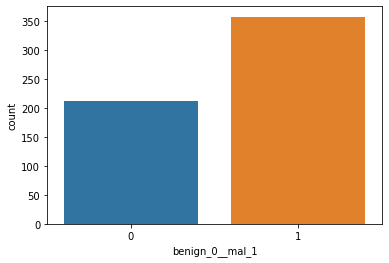

In [7]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

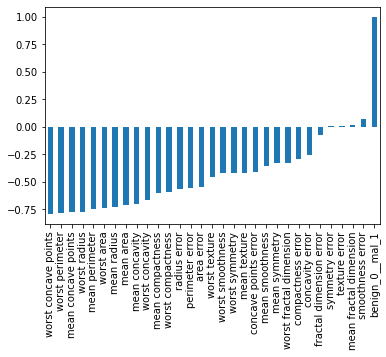

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

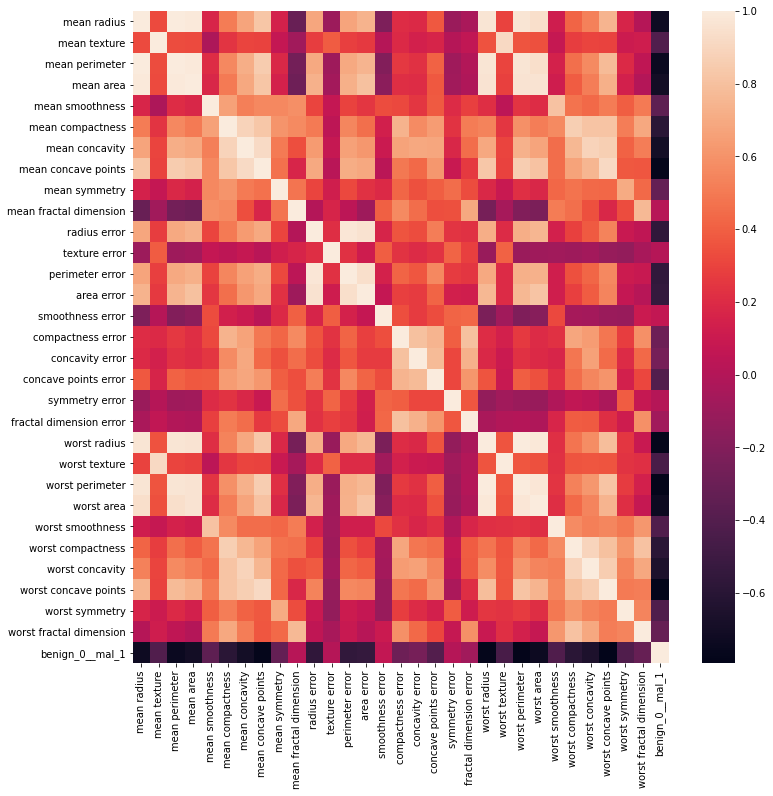

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

## Train Test Split


In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

## Scaling Data

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test= scaler.transform(X_test)

## Creating the model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [22]:
X_train.shape

(426, 30)

In [54]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [57]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7010 - val_loss: 0.6893
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6912 - val_loss: 0.6793
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6742 - val_loss: 0.6685
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6666 - val_loss: 0.6547
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6603 - val_loss: 0.6390
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6483 - val_loss: 0.6208
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6316 - val_loss: 0.5985
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5940 - val_loss: 0.5763
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5942 - val_loss: 0.5552
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5798 - val_loss: 0.5268
Epoch 11

In [58]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

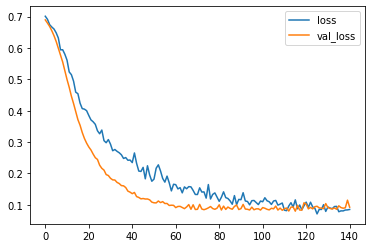

In [59]:
losses.plot()

# Model Evaluation

In [60]:
predictions = model.predict_classes(X_test)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [63]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
